# Image Transformation (i.e. Image Augmentation)

Learn how to apply various image augmentation techniques with TensorFlow 2.0. The transformations are meant to be applied for each image sample when training only, and each transformation will be performed with random parameters.

**Transformations:**
- Random flip left-right
- Random contrast, brightness, saturation and hue
- Random distortion and crop

For more information about loading data with TF2.0, see: [load_data.ipynb](load_data.ipynb)

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [ ]:
from __future__ import absolute_import, division, print_function

from IPython.display import Image as IImage, display
import numpy as np
import PIL
from PIL import Image
import random
import requests
import tensorflow as tf

In [ ]:
# Download an image.
d = requests.get("https://www.paristoolkit.com/Images/xeffel_view.jpg.pagespeed.ic.8XcZNqpzSj.jpg")
with open("image.jpeg", "wb") as f:
    f.write(d.content)

In [ ]:
# Load image to numpy array.
img = PIL.Image.open('image.jpeg')
img.load()
img_array = np.array(img)

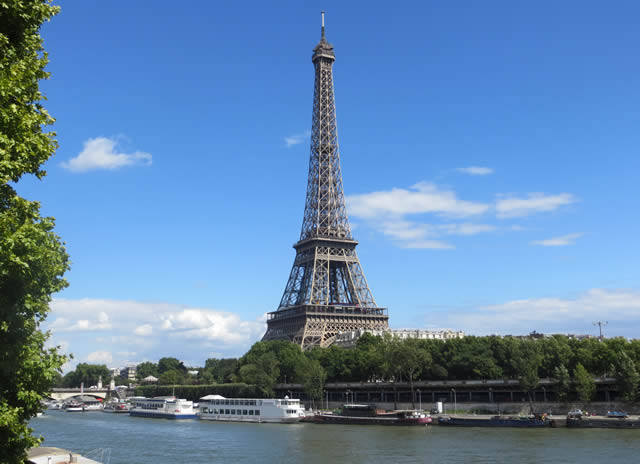

In [ ]:
# Display image.
PIL.Image.fromarray(img_array)

In [ ]:
# Randomly flip an image.
def random_flip_left_right(image):
    return tf.image.random_flip_left_right(image)

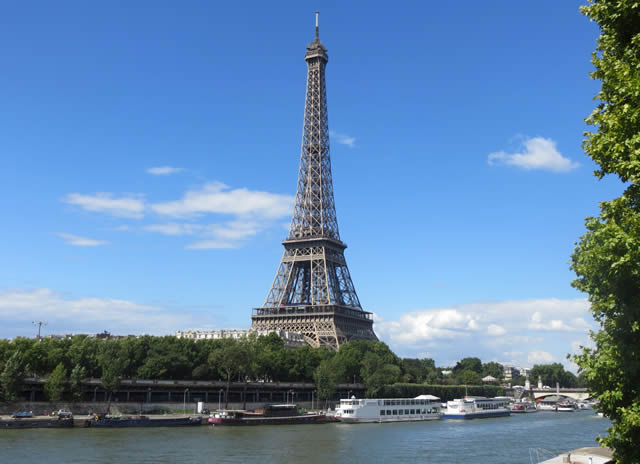

In [ ]:
# Display randomly flipped image.
PIL.Image.fromarray(random_flip_left_right(img_array).numpy())

In [ ]:
# Randomly change an image contrast.
def random_contrast(image, minval=0.6, maxval=1.4):
    r = tf.random.uniform([], minval=minval, maxval=maxval)
    image = tf.image.adjust_contrast(image, contrast_factor=r)
    return tf.cast(image, tf.uint8)

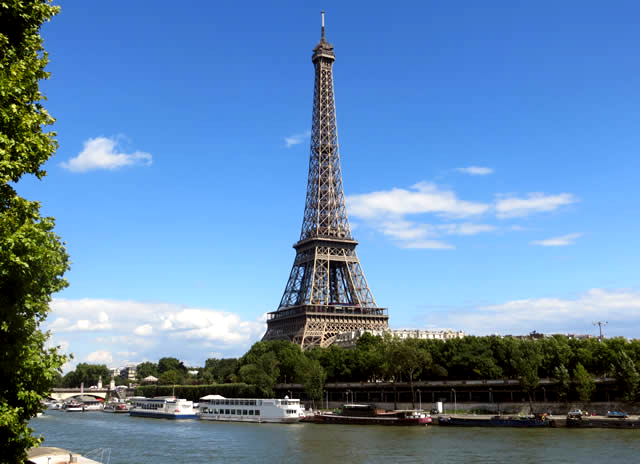

In [ ]:
# Display image with different contrast.
PIL.Image.fromarray(random_contrast(img_array).numpy())

In [ ]:
# Randomly change an image brightness
def random_brightness(image, minval=0., maxval=.2):
    r = tf.random.uniform([], minval=minval, maxval=maxval)
    image = tf.image.adjust_brightness(image, delta=r)
    return tf.cast(image, tf.uint8)

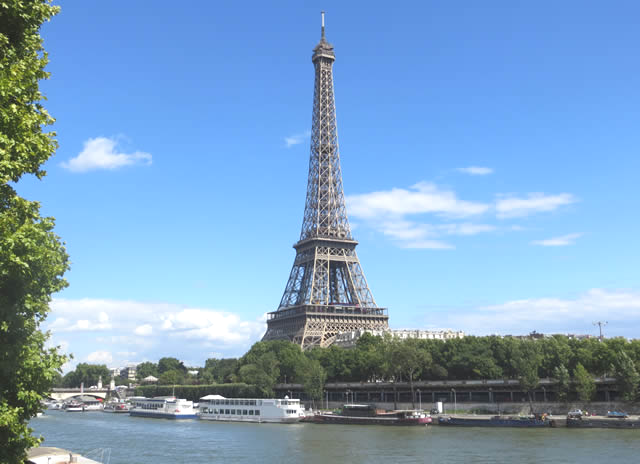

In [ ]:
# Display image with different brightness.
PIL.Image.fromarray(random_brightness(img_array).numpy())

In [ ]:
# Randomly change an image saturation
def random_saturation(image, minval=0.4, maxval=2.):
    r = tf.random.uniform((), minval=minval, maxval=maxval)
    image = tf.image.adjust_saturation(image, saturation_factor=r)
    return tf.cast(image, tf.uint8)

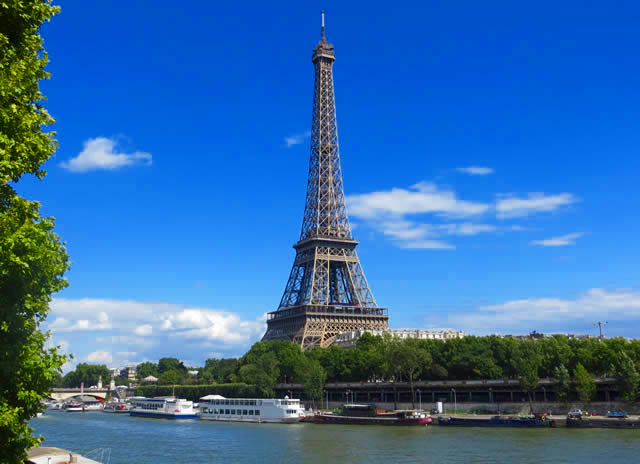

In [ ]:
# Display image with different staturation.
PIL.Image.fromarray(random_saturation(img_array).numpy())

In [ ]:
# Randomly change an image hue.
def random_hue(image, minval=-0.04, maxval=0.08):
    r = tf.random.uniform((), minval=minval, maxval=maxval)
    image = tf.image.adjust_hue(image, delta=r)
    return tf.cast(image, tf.uint8)

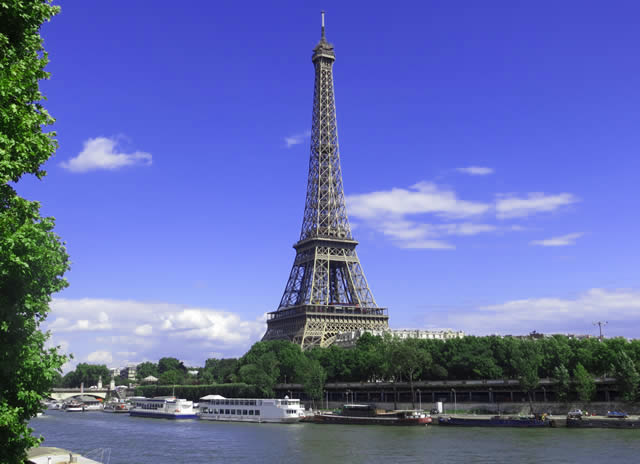

In [ ]:
# Display image with different hue.
PIL.Image.fromarray(random_hue(img_array).numpy())

In [ ]:
# Distort an image by cropping it with a different aspect ratio.
def distorted_random_crop(image,
                min_object_covered=0.1,
                aspect_ratio_range=(3./4., 4./3.),
                area_range=(0.06, 1.0),
                max_attempts=100,
                scope=None):

    cropbox = tf.constant([0.0, 0.0, 1.0, 1.0], dtype=tf.float32, shape=[1, 1, 4])
    sample_distorted_bounding_box = tf.image.sample_distorted_bounding_box(
        tf.shape(image),
        bounding_boxes=cropbox,
        min_object_covered=min_object_covered,
        aspect_ratio_range=aspect_ratio_range,
        area_range=area_range,
        max_attempts=max_attempts,
        use_image_if_no_bounding_boxes=True)
    bbox_begin, bbox_size, distort_bbox = sample_distorted_bounding_box

    # Crop the image to the specified bounding box.
    cropped_image = tf.slice(image, bbox_begin, bbox_size)
    return cropped_image

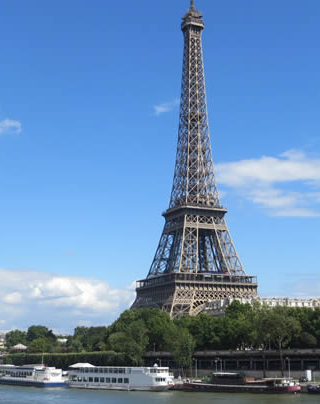

In [ ]:
# Display cropped image.
PIL.Image.fromarray(distorted_random_crop(img_array).numpy())

In [ ]:
# Apply all transformations to an image.
# That is a common image augmentation technique for image datasets, such as ImageNet.
def transform_image(image):
    image = distorted_random_crop(image)
    image = random_flip_left_right(image)
    image = random_contrast(image)
    image = random_brightness(image)
    image = random_hue(image)
    image = random_saturation(image)
    return image

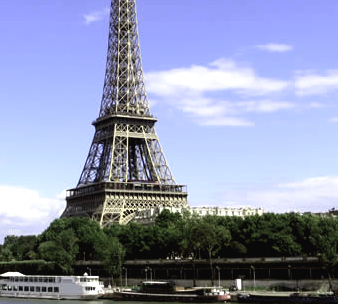

In [ ]:
# Display fully pre-processed image.
transformed_img = transform_image(img_array).numpy()
PIL.Image.fromarray(transformed_img)

In [ ]:
# Resize transformed image to a 256x256px square image, ready for training.
def resize_image(image):
    image = tf.image.resize(image, size=(256, 256), preserve_aspect_ratio=False)
    image = tf.cast(image, tf.uint8)
    return image

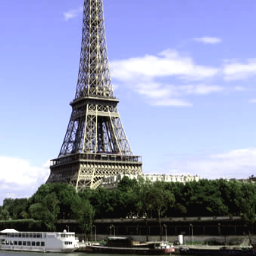

In [ ]:
# Display resized image.
PIL.Image.fromarray(resize_image(transformed_img).numpy())